In [1]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

In [8]:
'''data=pd.read_csv('Fort.csv',parse_dates=['timestamp_index'],index_col=['timestamp_index'])
data.index = pd.DatetimeIndex(data.index.values, freq='H')
'''
data1=pd.read_csv('Galle.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data1 = data1.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data2 = pd.read_csv('Matara.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data2 = data2.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data3 = pd.read_csv('Hambanthota.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data3 = data3.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data4=pd.read_csv('Katubedda.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data4 = data4.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data5 = pd.read_csv('Fort.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data5 = data5.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data6 = pd.read_csv('BattaramullaCEA.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
data6 = data6.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

data_list=[data1,data2,data3,data4,data5,data6]
#data = pd.concat([data1, data2, data3])
data = pd.concat(data_list)
#data.reset_index(drop=True, inplace=True)
data = data.sort_index()
data = data.groupby('timestamp_index').mean()
Length=len(data)
data
print(len(data))

8702


In [3]:
from statsmodels.tsa.stattools import adfuller 
'''
adfuller is a Hypothesis testing

H0=time series is not stationary
H1=time series is stationary
'''

def adfuller_test(data):
    results=adfuller(data)
    labels=['ADF test stat','p-value','No of lags used','No of observation used']
    #for value,label in zip(results,labels):
        #print(label+' : '+str(value))
    if results[1]<= 0.05:
        print("Rejecting null hypothesis ,data is stationary")
    else:
        print("No evidance to reject null hypothesis,data is not stationary")

In [4]:
adfuller_test(data['PM2.5 (ug/m3)'])
data

Rejecting null hypothesis ,data is stationary


,PM2.5 (ug/m3),Temperature (Celsius),Relative Humidity (%),hour,day,dayofweek,month
timestamp_index,,,,,,,
2022-12-25 00:00:00,56.75,31.40,65.00,0.0,25.0,6.0,12.0
2022-12-25 01:00:00,45.25,31.42,64.50,1.0,25.0,6.0,12.0
2022-12-25 02:00:00,43.50,31.25,64.00,2.0,25.0,6.0,12.0
2022-12-25 03:00:00,45.25,31.02,65.50,3.0,25.0,6.0,12.0
2022-12-25 04:00:00,48.75,30.00,70.50,4.0,25.0,6.0,12.0
...,...,...,...,...,...,...,...
2023-12-22 09:00:00,9.50,35.45,52.50,9.0,22.0,4.0,12.0
2023-12-22 10:00:00,16.50,37.05,48.25,10.0,22.0,4.0,12.0
2023-12-22 11:00:00,10.00,32.92,59.25,11.0,22.0,4.0,12.0


In [5]:
# Splitting data into train and test sets
train_data = data['PM2.5 (ug/m3)'].iloc[:int(Length*0.8)]
test_data = data['PM2.5 (ug/m3)'].iloc[int(Length*0.8):]

In [6]:
test_data

timestamp_index
2023-10-11 01:00:00     5.833333
2023-10-11 02:00:00     6.000000
2023-10-11 03:00:00     8.333333
2023-10-11 04:00:00     8.625000
2023-10-11 05:00:00    13.958333
                         ...    
2023-12-22 09:00:00     9.500000
2023-12-22 10:00:00    16.500000
2023-12-22 11:00:00    10.000000
2023-12-22 12:00:00     7.250000
2023-12-22 13:00:00     6.000000
Name: PM2.5 (ug/m3), Length: 1741, dtype: float64

In [7]:
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=1500)  # Adjust parameters as needed
fit_model = model.fit()
predictions = fit_model.predict(start=test_data.index[0], end=test_data.index[-1])

c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


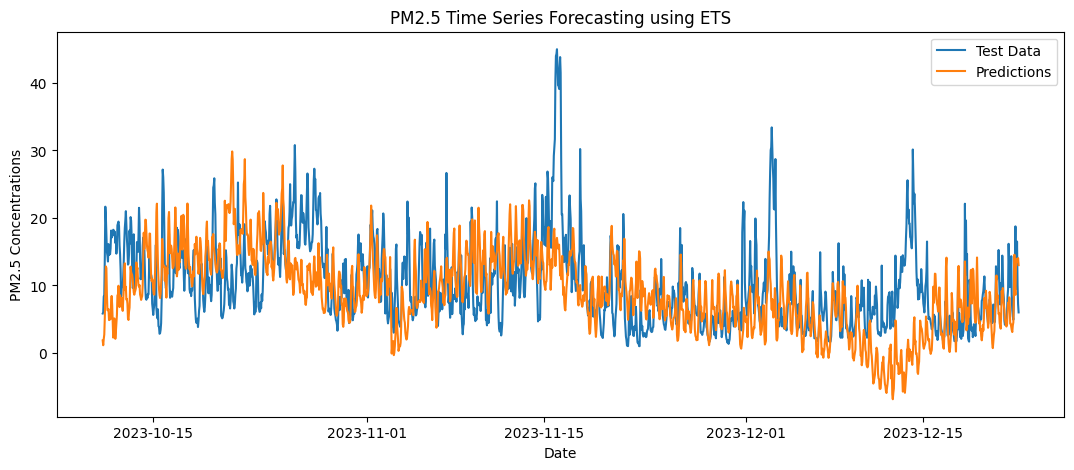

In [9]:
plt.figure(figsize=(13, 5))
#plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(predictions.index, predictions, label='Predictions')
plt.title('PM2.5 Time Series Forecasting using ETS')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentrations')
plt.legend()
plt.show()



In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'y_true' is the actual values and 'y_pred' is the predicted values
y_true = test_data  # Replace with your actual values
y_pred = predictions


# Calculate evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False) # Compute RMSE from MSE

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 5.0428987819022435
Mean Squared Error (MSE): 37.489880294451005
Root Mean Squared Error (RMSE): 6.122898030708253


In [11]:
from scipy.signal import periodogram
import numpy as np

fs = 1  # The sampling frequency. Set to 1 if your data is in days, months, etc.
frequencies, spectrum = periodogram(train_data, fs=fs)

# Find the index of the maximum power in the spectrum
max_power_index = np.argmax(spectrum)

# The corresponding frequency is the inverse of the seasonal period
seasonal_period = 1 / frequencies[max_power_index]
seasonal_period

1875.5